# Polynomial Regression

This is a simple polynomial regression example, and we use oneAPI to speed it up.

In this sample, we will work around the data file `data.txt`.

## Importing data
First we need to import all the required packages, and import Intel(R) Extension for Scikit-learn*.

In [33]:
#Intel(R) Extension for Scikit-learn dynamically patches scikit-learn estimators to use oneDAL as the underlying solver
from sklearnex import patch_sklearn
patch_sklearn()

import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as mp
import sklearn.metrics as sm
import sklearn.preprocessing as sp
import sklearn.pipeline as pl

x ,y = np.loadtxt('data.txt',
    delimiter=',', usecols=(0,1),
    unpack=True)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Preparing data
Change x from a row vector to a column vector to make it conform to the training input format.

In [34]:
# Change x to n rows and 1 column
x = x.reshape(-1, 1)

## Theoretical Analysis

General form of polynomial in one variable:

y = w<sub>0</sub> + w<sub>1</sub> x + w<sub>2</sub> x<sup>2</sup> + w<sub>3</sub> x<sup>3</sup> + … + w<sub>n</sub> x<sup>n</sup>

Polynomial function of one variable can be regarded as a linear equation of many variables:

y = w<sub>0</sub> + w<sub>1</sub> x<sub>1</sub> + w<sub>2</sub> x<sub>2</sub> + w<sub>3</sub> x<sub>3</sub> + … + w<sub>n</sub> x<sub>n</sub>

Therefore, one-dimensional polynomial regression can be regarded as multiple linear regression, and a LinearRegression model can be used to train the model on the sample data.

## Training model

It is necessary to select and set an appropriate polynomial highest order term. If it is too high, overfitting will occur, and if it is too low, underfitting will occur. Here, 5 is taken as an example.

In [35]:
# Create a pipeline to merge steps
model = pl.make_pipeline(
    sp.PolynomialFeatures(5),
    lm.LinearRegression()
)
model.fit(x, y)
pred_y = model.predict(x)

## Error Estimation

We need to select some indicators to evaluate the error of the regression model.

In [36]:
# Mean absolute value error   1/n∑|Predictive output-Real output|
print(sm.mean_absolute_error(y, pred_y))

# Mean squared error   sqrt(1/n∑(Predictive output-Real output)^2)
print(sm.mean_squared_error(y, pred_y))

# Median absolute value error   median(|Predictive output-Real output|)
print(sm.median_absolute_error(y, pred_y))

# r2 is a value of the score (0,1]. The higher the score, the smaller the error
print(sm.r2_score(y, pred_y))

0.5158603469906121
0.3990443434557377
0.4210308824645457
0.7586565632605782


## Plotting curve

Draw images to visually show the difference between the model and the data.

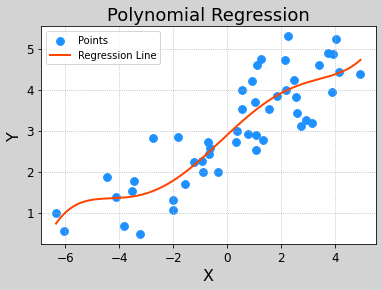

In [37]:
# To draw a polynomial model curve, build 1000 points
test_x = np.linspace(x.min(), x.max(), 1000)
test_x = test_x.reshape(-1, 1)
pred_test_y = model.predict(test_x)

mp.figure('Polynomial Regression', facecolor='lightgray')
mp.title('Polynomial Regression', fontsize=18)
mp.xlabel('X', fontsize=16)
mp.ylabel('Y', fontsize=16)
mp.tick_params(labelsize=12)
mp.grid(linestyle=':')
mp.scatter(x, y, s=60, c='dodgerblue',label='Points')
mp.plot(test_x, pred_test_y, c='orangered', linewidth=2, label='Regression Line')
mp.legend()
mp.show()